In [1]:
import bpy
from IPython.display import display, Image

def fresh_scene():
    # Deselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    # Select all objects except cameras
    for obj in bpy.context.scene.objects:
        if  obj.type != 'CAMERA':
            obj.select_set(True)
        else:
            obj.select_set(False)
    bpy.ops.object.delete()
    
    # add light
    bpy.ops.object.light_add(type='SUN')
    sun = bpy.context.object

    sun.location = (0, 0, 0)
    from math import radians
    sun.rotation_euler = (radians(204), radians(-133), radians(-67))
    sun.data.energy = 5  


def render_result():
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath="img.png")
    display(Image(filename="img.png"))


In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/kolibril13/ipydrop/refs/heads/main/dino.csv'
df = pd.read_csv(url)
df.head()

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


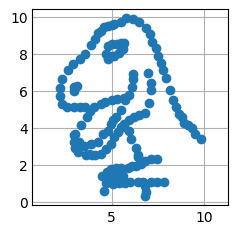

In [44]:
import matplotlib.pyplot as plt

# Extract x and y from the DataFrame
x_values = df['x'] / 10
y_values = df['y'] / 10

# Create the scatter plot using plt.scatter
plt.axis('equal');
plt.style.use('_mpl-gallery')
plt.scatter(x_values, y_values);

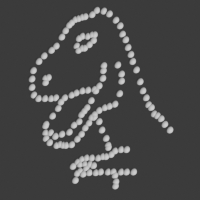

In [45]:
fresh_scene()


bpy.context.scene.render.resolution_x = 200
bpy.context.scene.render.resolution_y = 200

for (x, y) in zip(x_values,y_values):    
    bpy.ops.mesh.primitive_uv_sphere_add(radius=0.2, location=(x, y, 0))

from math import radians

# Get the camera object (assuming the active object is a camera)
camera = bpy.context.scene.camera

# Set the location of the camera (adjust as needed)
camera.location = (6, 5, 10)  # Position above the XY plane

# Point the camera towards the XY plane
camera.rotation_euler = (0, 0, 0)  # Rotate to look at XY plane

# Set the camera to orthographic mode
camera.data.type = 'ORTHO'

# Set the orthographic scale to 12
camera.data.ortho_scale = 11
render_result()

In [36]:
# temp
bpy.ops.wm.save_as_mainfile(filepath="deno.blend")

Info: Saved "deno.blend"


{'FINISHED'}